In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input , Dropout
import matplotlib.pyplot as plt
import joblib

In [2]:
# Upload Data
from google.colab import files
upload = files.upload()

Saving train_dataset.csv to train_dataset.csv


In [3]:
# Prepare the Data

#read data
data = pd.read_csv('train_dataset.csv')

#convert from textual into numerique
numerique = LabelEncoder()
data['sales'] = numerique.fit_transform(data['sales'].astype('str'))
data['salary'] = numerique.fit_transform(data['salary'].astype('str'))

#splitt data into features and target
x = data.drop('left',axis=1)
y = data['left']

#split data
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3,random_state=42)

#scaler data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [4]:
# Build Model
model = Sequential()
model.add(Input(shape=(9,)))

#first layer
model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.3))

#second layer
model.add(Dense(units=32 , activation='relu'))
model.add(Dropout(0.3))

#third layer
model.add(Dense(units=1 , activation='sigmoid'))

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(x_train , y_train , epochs=10 , batch_size=32 , validation_split=0.3)

#evaluation the model
loss , accuracy = model.evaluate(x_test,y_test)
print('accuracy:', accuracy * 100, '%')


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7728 - loss: 0.4858 - val_accuracy: 0.9302 - val_loss: 0.2275
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9074 - loss: 0.2432 - val_accuracy: 0.9435 - val_loss: 0.1804
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2094 - val_accuracy: 0.9479 - val_loss: 0.1656
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9318 - loss: 0.2089 - val_accuracy: 0.9533 - val_loss: 0.1581
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9450 - loss: 0.1751 - val_accuracy: 0.9543 - val_loss: 0.1549
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9485 - loss: 0.1665 - val_accuracy: 0.9575 - val_loss: 0.1517
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.1611 - val_accuracy: 0.9600 - val_loss: 0.1441
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9515 - loss: 0.1603 - val_accuracy: 0.

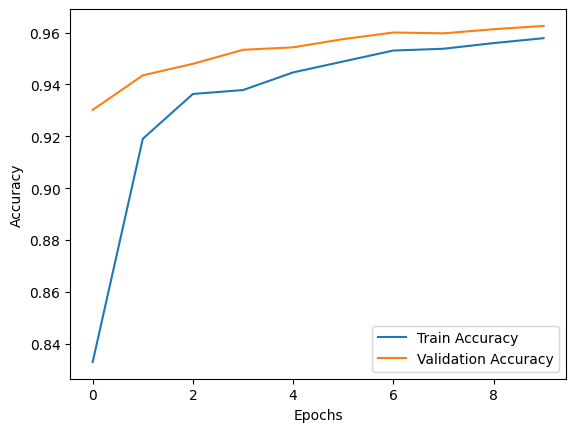

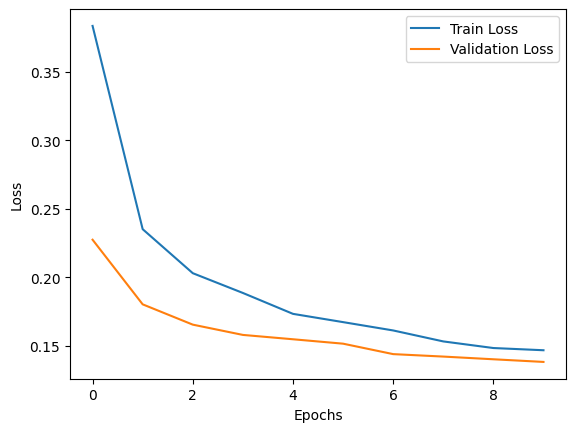

In [5]:
# Drawing training results

# رسم دقة النموذج
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Save and Download the Model

model.save('Model.h5')
files.download('Model.h5')

# Save and Download the StandardScaler
joblib.dump(scaler, 'StandardScaler.pkl')
files.download('StandardScaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>